In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Load Titanic dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Drop columns with too many missing values or not useful
df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert categorical columns using Label Encoding
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,False
1,1,1,0,38.0,1,0,71.2833,0,False
2,1,3,0,26.0,0,0,7.9250,2,True
3,1,1,0,35.0,1,0,53.1000,2,False
4,0,3,1,35.0,0,0,8.0500,2,True


In [5]:
X = df.drop("survived", axis=1)
y = df["survived"]

# Use chi-square test for top features
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['pclass', 'sex', 'age', 'fare', 'alone'], dtype='object')


In [6]:
X_selected = df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7692307692307693

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        80
           1       0.76      0.70      0.73        63

    accuracy                           0.77       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.77      0.77       143


Confusion Matrix:
 [[66 14]
 [19 44]]


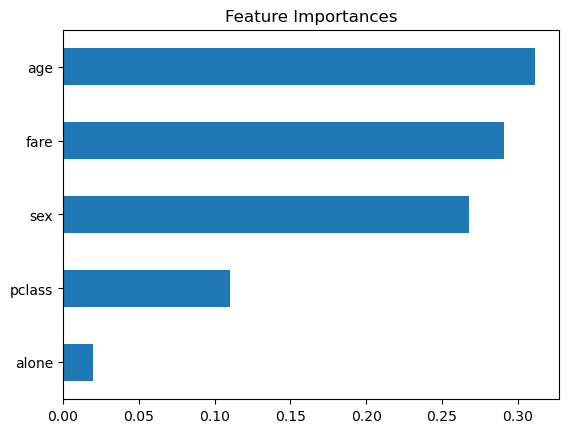

In [10]:
feature_importances = pd.Series(model.feature_importances_, index=selected_features)
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()
